<a href="https://colab.research.google.com/github/JITHINJITH/AI-LAB/blob/master/Autoencoder_for_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
import matplotlib.pyplot as plt
print(iris.feature_names)

#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,stratify = y, random_state=42)

from tensorflow import keras


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
encoder = keras.models.Sequential(keras.layers.Dense(2,input_shape = [4],activation='linear'))
decoder = keras.models.Sequential(keras.layers.Dense(4,input_shape = [2],activation='linear'))

In [3]:
auto = keras.models.Sequential([encoder,decoder])

In [4]:
auto.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 10        
_________________________________________________________________
sequential_1 (Sequential)    (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [ ]:
auto.compile(optimizer='adam',loss='mse')
history_ae = auto.fit(X_train,y_train,epochs=400)

In [6]:
output_ae = auto.predict(X_test)
output_ae.shape

(75, 4)

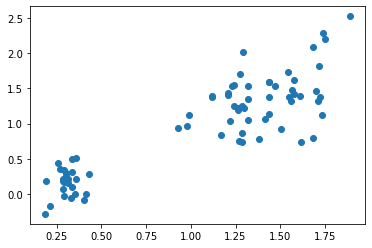

In [7]:
plt.scatter(output_ae[:,0],output_ae[:,1])